In [29]:


import matplotlib.pyplot as plt
# from matplotlib.patches import Rectangle
from matplotlib import ticker, cm, colors

from scipy.stats import linregress

from extract_ITER_data import x_inner, E_inner, phi_inner,\
    x_outer, E_outer, phi_outer

try:
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif', size=12)
except:
    pass


In [65]:
from scipy.interpolate import interp1d
from scipy import integrate
import numpy as np

phi_ = np.logspace(19, 24+np.log10(2), endpoint=True, num=300)
E_ = np.logspace(-1+np.log10(5), 2, endpoint=True, num=300)

phi_H_ = np.logspace(4, 7, endpoint=True)
# T_ = [
#     324, 324, 324, 324, 325, 325.1, 325.6, 325.7, 326, 326.5, 327, 327.6, 328.3, 329.1, 330, 331,
#     332, 333, 335.28, 337, 339, 341, 344, 347, 351, 355, 360, 366, 373, 380, 389, 400, 412,
#     425, 441, 460, 482, 507, 536, 570, 610, 657, 712, 777, 854, 944, 1051, 1178, 1327, 1503
#     ]

# T_phi_H = interp1d(phi_H_, T_, fill_value='extrapolate')

T_min, T_avg, T_max = [], [], []
import csv
for e in phi_H_:
    x, temperatures = [], []
    with open('Solution_T/Solutions/{:.0f}/profile.csv'.format(e)) as csvfile:
        readCSV = csv.reader(csvfile, delimiter=',')
        next(readCSV)
        for row in readCSV:
            if row[0] != 'nan':
                temperatures.append(float(row[0]))
                temp_av += float(row[0])
                x.append(float(row[2]))
    T_avg.append(np.trapz(temperatures, x)/(max(x) - min(x)))
    T_min.append(min(temperatures))
    T_max.append(max(temperatures))
T_phi_H = interp1d(phi_H_, T_avg, fill_value='extrapolate')
print(T_min)
print(T_avg)
print(T_max)
print(phi_H_)


[324.01, 324.14, 324.28, 324.46, 324.65, 324.88, 325.14, 325.45, 325.8, 326.2, 326.66, 327.19, 327.8, 328.51, 329.32, 330.25, 331.33, 332.57, 334.0, 335.65, 337.55, 339.74, 342.26, 345.17, 348.53, 352.4, 356.86, 362.01, 367.96, 374.83, 382.76, 391.94, 402.55, 414.84, 429.07, 445.57, 464.72, 486.98, 512.89, 543.07, 578.31, 619.52, 667.81, 724.52, 791.26, 869.95, 962.88, 1072.7, 1202.4, 1315.1]
[324.0583083083083, 324.1957607607608, 324.35410410410407, 324.5363113113113, 324.74609609609604, 324.98760260260264, 325.2664064064064, 325.58680180180176, 325.95596096096097, 326.38100600600603, 326.8706956956957, 327.4343093093093, 328.08389889889884, 328.83185685685686, 329.69345345345346, 330.6860860860861, 331.8292592592593, 333.1467117117117, 334.6645145145145, 336.4133883883884, 338.42915915915916, 340.75227227227225, 343.4307607607607, 346.5188288288289, 350.0805305305305, 354.189029029029, 358.92981981981984, 364.40192192192194, 370.72055555555556, 378.01986986986986, 386.4562562562563, 

In [3]:
import properties

def K(T):
    return 3e-25/(T**0.5)*np.exp(-(-2.06)/8.6e-5/T)
    # return 1.3e-17*np.exp(-0.84/8.6e-5/T)
    # return 2.9e-18*np.exp(-1.16/8.6e-5/T)

def D(T):
    return properties.D_0_W*np.exp(-properties.E_D_W/8.6e-5/T)
    # return 2.06e-7*np.exp(-0.28/8.6e-5/T)
    # return 2.9e-7*np.exp(-0.39/8.6e-5/T)

def R_p(E):
    return 1.3636e-10*E**(6.372e-1)

def r(E):
    return 2e-8*E**2 - 6e-5*E + 0.8096

def phi_H(phi_inc, E):
    return phi_inc*1.6e-19*(E + 13.6)*2.2


X, Y = np.meshgrid(phi_, E_)
T = T_phi_H(phi_H(X, Y))
c_max_recomb = R_p(Y)*X*(1-r(Y))/D(T) + (X*(1-r(Y))/K(T))**0.5
# c_max_recomb = R_p(Y)*(1-r(E))X/D(T_phi_H(phi_H(X, Y))) + calculate_c_0(X, T_phi_H(phi_H(X, Y)))
c_max_instant = R_p(Y)*X*(1-r(Y))/D(T)

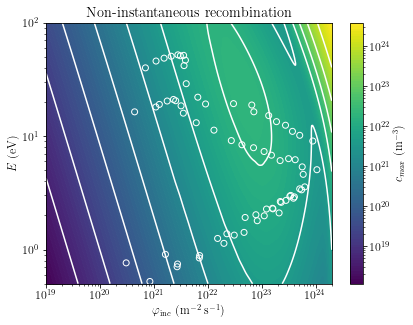

In [8]:
colorbar = "viridis"
# contour c_max non instant
fig, ax = plt.subplots(figsize=(6.4, 4.8))
plt.title("Non-instantaneous recombination")
levels = np.logspace(
    np.log10(np.min(c_max_recomb)),
    np.log10(np.max(c_max_recomb)),
    100)
levels2 = np.logspace(
    np.log10(np.min(c_max_recomb)),
    np.log10(np.max(c_max_recomb)),
    12)
locator = ticker.LogLocator(base=10)
CS = ax.contourf(X, Y, c_max_recomb, levels=levels, locator=locator, cmap=colorbar)
fig.colorbar(CS, label=r"$c_{max}$ (m$^{-3}$)", ticks=locator)
CS2 = ax.contour(X, Y, c_max_recomb, levels=levels2, locator=locator, colors="white")
plt.scatter(
    phi_inner + phi_outer,
    E_inner + E_outer,
    facecolors='none',
    edgecolors='white'
    )
for c in CS.collections:  # for avoiding white lines in pdf
    c.set_edgecolor("face")
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\varphi_\mathrm{inc}$ (m$^{-2}$ s$^{-1}$)")
plt.ylabel(r"$E$ (eV)")
plt.show()

In [48]:
fontsize = 20
labelsize = 14

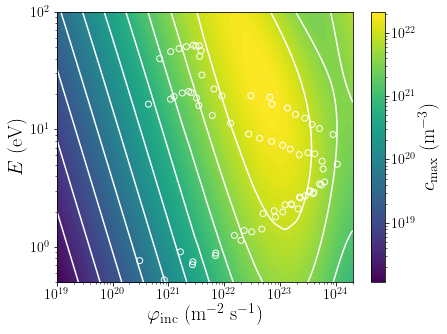

In [49]:
fig, ax = plt.subplots(figsize=(6.4, 4.8))
# plt.title("Instantaneous recombination")
levels = np.logspace(
    np.log10(np.min(c_max_instant)),
    np.log10(np.max(c_max_instant)),
    100)
levels2 = np.logspace(
    np.log10(np.min(c_max_instant)),
    np.log10(np.max(c_max_instant)),
    12)
locator = ticker.LogLocator(base=10)
CS = ax.contourf(X, Y, c_max_instant, levels=levels, locator=locator, cmap=colorbar)

cbar = fig.colorbar(CS, ticks=locator)
CS2 = ax.contour(X, Y, c_max_instant, levels=levels2, locator=locator, colors="white")
plt.scatter(
    phi_inner + phi_outer,
    E_inner + E_outer,
    facecolors='none',
    edgecolors='white'
    )
for c in CS.collections:  # for avoiding white lines in pdf
    c.set_edgecolor("face")
ax.tick_params(axis='both', which='major', labelsize=labelsize)
cbar.ax.tick_params(labelsize=labelsize)
cbar.set_label(label=r"$c_\mathrm{max}$ (m$^{-3}$)", size=fontsize)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\varphi_\mathrm{inc}$ (m$^{-2}$ s$^{-1}$)", fontsize=fontsize)
plt.ylabel(r"$E$ (eV)", fontsize=fontsize)
plt.tight_layout()
plt.savefig("Figures/c_max_instantaneous.pdf")
plt.show()

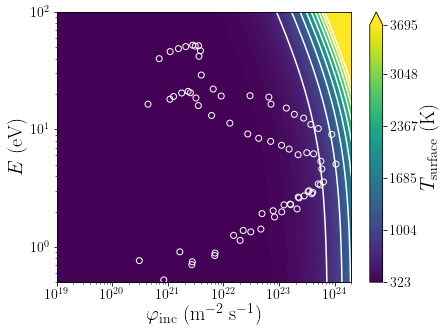

In [50]:
# temperature
fig, ax = plt.subplots(figsize=(6.4, 4.8))
levels = np.linspace(323, 3695, 100, endpoint=True)
levels2 = np.linspace(323, 3695, 10, endpoint=True)
CS = ax.contourf(X, Y, T, levels=levels, extend="max", cmap=colorbar)

plt.scatter(
    phi_inner + phi_outer,
    E_inner + E_outer,
    facecolors='none',
    edgecolors='white'
    )

cbar = fig.colorbar(CS, ticks=[*levels[0:len(levels):20], levels[-1]])
CS2 = ax.contour(X, Y, T, levels=levels2, locator=locator, colors="white")

ax.tick_params(axis='both', which='major', labelsize=labelsize)
cbar.ax.tick_params(labelsize=labelsize)
cbar.set_label(label=r"$T_\mathrm{surface}$ (K)", size=fontsize)

plt.xlabel(r"$\varphi_\mathrm{inc}$ (m$^{-2}$ s$^{-1}$)", fontsize=fontsize)
plt.ylabel(r"$E$ (eV)", fontsize=fontsize)
for c in CS.collections:  # for avoiding white lines in pdf
    c.set_edgecolor("face")
plt.xscale("log")
plt.yscale("log")
plt.tight_layout()
plt.savefig("Figures/T_phi_E.pdf")
plt.show()

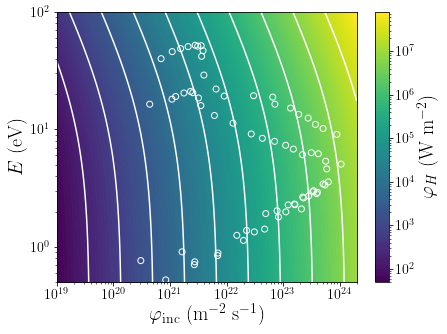

In [51]:
# heat flux
fig, ax = plt.subplots(figsize=(6.4, 4.8))
flux = phi_H(X, Y)
levels = np.logspace(
    np.log10(np.min(flux)),
    np.log10(np.max(flux)),
    100)
levels2 = np.logspace(
    np.log10(np.min(flux)),
    np.log10(np.max(flux)),
    12)
CS = ax.contourf(X, Y, flux, levels=levels, locator=ticker.LogLocator(), cmap=colorbar)
CS2 = ax.contour(X, Y, flux, levels=levels2, locator=locator, colors="white")
plt.scatter(
    phi_inner + phi_outer,
    E_inner + E_outer,
    facecolors='none',
    edgecolors='white'
    )
cbar = fig.colorbar(CS, ticks=locator)

ax.tick_params(axis='both', which='major', labelsize=labelsize)
cbar.ax.tick_params(labelsize=labelsize)
cbar.set_label(label=r"$\varphi_{H}$ (W m$^{-2}$)", size=fontsize)
plt.xlabel(r"$\varphi_\mathrm{inc}$ (m$^{-2}$ s$^{-1}$)", fontsize=fontsize)
plt.ylabel(r"$E$ (eV)", fontsize=fontsize)
plt.xscale("log")
plt.yscale("log")
for c in CS.collections:  # for avoiding white lines in pdf
    c.set_edgecolor("face")
plt.tight_layout()
plt.savefig("Figures/phi_H_phi_E.pdf")
plt.show()

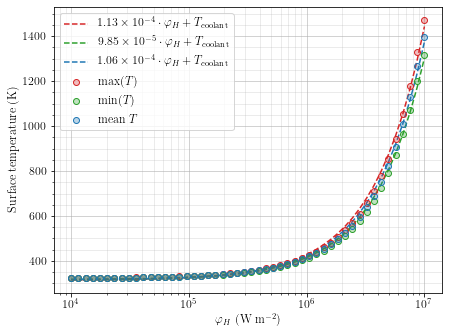

In [68]:
def as_si(x, ndp):
    s = '{x:0.{ndp:d}e}'.format(x=x, ndp=ndp)
    m, e = s.split('e')
    return r'{m:s}\times 10^{{{e:d}}}'.format(m=m, e=int(e))

plt.figure(figsize=(6.4, 4.8))

slope, intercept, r_value, p_value, std_err = linregress(phi_H_, T_max)
plt.plot(phi_H_, slope*phi_H_ + intercept, label=r'$'+ as_si(slope, 2) + r'\cdot \varphi_H + T_\mathrm{coolant}$', color="tab:red",
         linestyle="--")
plt.scatter(
    phi_H_, T_max, zorder=3, facecolors=(*colors.to_rgb('tab:red'),0.3),
    edgecolors=(*colors.to_rgb('tab:red'),1),
    label=r"max($T$)")

slope, intercept, r_value, p_value, std_err = linregress(phi_H_, T_min)
plt.plot(phi_H_, slope*phi_H_ + intercept, label=r'$'+ as_si(slope, 2) + r'\cdot \varphi_H + T_\mathrm{coolant}$', color="tab:green",
         linestyle="--")
plt.scatter(
    phi_H_, T_min, zorder=3, facecolors=(*colors.to_rgb('tab:green'),0.3),
    edgecolors=(*colors.to_rgb('tab:green'),1),
    label=r"min($T$)")

slope, intercept, r_value, p_value, std_err = linregress(phi_H_, T_avg)
plt.plot(phi_H_, slope*phi_H_ + intercept, label=r'$'+ as_si(slope, 2) + r'\cdot \varphi_H + T_\mathrm{coolant}$', color="tab:blue",
         linestyle="--")
plt.scatter(
    phi_H_, T_avg, zorder=3, facecolors=(*colors.to_rgb('tab:blue'),0.3),
    edgecolors=(*colors.to_rgb('tab:blue'),1),
    label=r"mean $T$")

plt.ylabel(r"Surface temperature (K)")
plt.xlabel(r"$\varphi_{H}$ (W m$^{-2}$)")
plt.xscale("log")
plt.legend()
plt.minorticks_on()
plt.grid(which='minor', alpha=0.3)
plt.grid(which='major', alpha=0.7)
plt.tight_layout()
plt.savefig("Figures/temperature_phi_H.pdf")
plt.show()